## Lab I- Revisiting Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSetLab.csv')

/var/folders/zh/vb5lf3750v95681z25hzkm9c0000gn/T/ipykernel_91641/3304671770.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSetLab.csv')


In [3]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [4]:
numerical = data.select_dtypes(np.number)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [5]:
numerical.shape

(95412, 407)

In [6]:
categorical = data.select_dtypes([object])
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [7]:
categorical.shape

(95412, 74)

### Check for null values in all the columns

In [8]:
data.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

In [9]:
data.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64

In [10]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [11]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


### Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. 
We will append this list and then drop all the columns in this list later:
    OSOURCE - symbol definitions not provided, too many categories
    ZIP CODE - we are including state already

In [12]:
drop_list = data[['OSOURCE','ZIP']].values.tolist()

In [13]:
drop_list

[['GRI', '61081'],
 ['BOA', '91326'],
 ['AMH', '27017'],
 ['BRY', '95953'],
 [' ', '33176'],
 ['CWR', '35603'],
 ['DRK', '46755'],
 ['NWN', '70611'],
 ['LIS', '51033'],
 ['MSD', '37127-'],
 ['AGR', '67335'],
 ['CSM', '46220'],
 ['ENQ', '56475'],
 ['HCC', '70791'],
 ['USB', '84720'],
 ['FRC', '90056'],
 ['RKB', '48067'],
 ['PCH', '62376'],
 ['AMB', '32810'],
 ['L15', '27850'],
 ['BBK', '55125'],
 ['L21', '49247'],
 ['SYN', '33983'],
 ['L01', '60042'],
 ['MOP', '55044'],
 ['UCA', '93527-'],
 ['ESN', '60091'],
 ['L01', '64468'],
 ['IMP', '77381'],
 ['AVN', '62249'],
 ['SYN', '77546'],
 ['RMG', '63031'],
 ['DNA', '27106'],
 ['L04', '33143'],
 ['AML', '97008'],
 [' ', '97708'],
 ['AIR', '78748'],
 ['DUR', '90274'],
 ['LHJ', '55112'],
 ['WKB', '55066-'],
 ['AGR', '61604'],
 ['STL', '49506'],
 ['DCD', '98006'],
 ['AGR', '33332'],
 ['IMA', '53221'],
 ['DRK', '52402'],
 ['GRI', '36322'],
 ['L01', '46350'],
 ['ACS', '98116'],
 ['ALZ', '75606'],
 ['DNA', '61273'],
 ['DRK', '27703'],
 ['NEX', '271

In [14]:
data.drop(['OSOURCE', 'ZIP'], axis=1, inplace=True)

### Identify columns that over 85% missing values

In [15]:
def null_value_columns(df, threshold=0.85):
    null_counts = df.isnull().sum()/len(df)
    null_cols = null_counts[null_counts > threshold].index.tolist()
    return null_cols

In [16]:
null_cols = null_value_columns(data)
print(null_cols)

['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


In [17]:
null_cols = null_value_columns(categorical)
print(null_cols)

[]


In [18]:
for col in null_cols:
    drop_list.append([col])

In [19]:
drop_list

[['GRI', '61081'],
 ['BOA', '91326'],
 ['AMH', '27017'],
 ['BRY', '95953'],
 [' ', '33176'],
 ['CWR', '35603'],
 ['DRK', '46755'],
 ['NWN', '70611'],
 ['LIS', '51033'],
 ['MSD', '37127-'],
 ['AGR', '67335'],
 ['CSM', '46220'],
 ['ENQ', '56475'],
 ['HCC', '70791'],
 ['USB', '84720'],
 ['FRC', '90056'],
 ['RKB', '48067'],
 ['PCH', '62376'],
 ['AMB', '32810'],
 ['L15', '27850'],
 ['BBK', '55125'],
 ['L21', '49247'],
 ['SYN', '33983'],
 ['L01', '60042'],
 ['MOP', '55044'],
 ['UCA', '93527-'],
 ['ESN', '60091'],
 ['L01', '64468'],
 ['IMP', '77381'],
 ['AVN', '62249'],
 ['SYN', '77546'],
 ['RMG', '63031'],
 ['DNA', '27106'],
 ['L04', '33143'],
 ['AML', '97008'],
 [' ', '97708'],
 ['AIR', '78748'],
 ['DUR', '90274'],
 ['LHJ', '55112'],
 ['WKB', '55066-'],
 ['AGR', '61604'],
 ['STL', '49506'],
 ['DCD', '98006'],
 ['AGR', '33332'],
 ['IMA', '53221'],
 ['DRK', '52402'],
 ['GRI', '36322'],
 ['L01', '46350'],
 ['ACS', '98116'],
 ['ALZ', '75606'],
 ['DNA', '61273'],
 ['DRK', '27703'],
 ['NEX', '271

### Remove those columns from the dataframe

In [20]:
data.drop(['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23'], axis=1, inplace=True)

In [21]:
data

,ODATEDW,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_8,RDATE_9,RDATE_11,RDATE_12,RDATE_14,RDATE_16,RDATE_18,RDATE_19,RDATE_22,RDATE_24,RAMNT_8,RAMNT_9,RAMNT_11,RAMNT_12,RAMNT_14,RAMNT_16,RAMNT_18,RAMNT_19,RAMNT_22,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,0,IL,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,

### Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [22]:
categorical['GENDER'].unique()

array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

In [23]:
categorical['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [24]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [25]:
def gender(x): 
    if x == 'F': 
        return x
    elif x == 'M':
        return x 
    else: 
        return 'other'

In [26]:
categorical['GENDER'] = categorical['GENDER'].apply(gender)

In [27]:
categorical['GENDER'].unique()

array(['F', 'M', 'other'], dtype=object)

## Lab II- Feature Engineering

### Check for null values in the numerical columns

In [28]:
numerical.isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64

In [29]:
num_nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
num_nulls_percent_df.columns = ['column_name', 'nulls_percentage']

num_nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [30]:
num_nulls_percent_df[num_nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
3,AGE,0.248030
4,NUMCHLD,0.870184
5,INCOME,0.223096
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
...,...,...
386,RAMNT_23,0.917631
387,RAMNT_24,0.814090
398,NEXTDATE,0.104526
399,TIMELAG,0.104526


### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

### GEOCODE2

In [31]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [32]:
m = categorical[categorical['GEOCODE2'].notna()]['GEOCODE2'].mode()[0]
m

'A'

In [33]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna(m)

In [34]:
categorical['GEOCODE2'].value_counts(dropna=False)

A    34616
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

### WEALTH1

In [35]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [36]:
m = numerical[numerical['WEALTH1'].notna()]['WEALTH1'].mode()[0]
m

9.0

In [37]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(m)

In [38]:
numerical['WEALTH1'].value_counts(dropna=False)

9.0    52317
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

### ADI

In [39]:
numerical['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [40]:
m = numerical[numerical['ADI'].notna()]['ADI'].mode()[0]
m

13.0

In [41]:
numerical['ADI'] = numerical['ADI'].fillna(m)

In [42]:
numerical['ADI'].value_counts(dropna=False)

13.0     7428
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

### DMA

In [43]:
numerical['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [44]:
m = numerical[numerical['DMA'].notna()]['DMA'].mode()[0]
m

803.0

In [45]:
numerical['DMA'] = numerical['DMA'].fillna(m)

In [46]:
numerical['DMA'].value_counts(dropna=False)

803.0    7428
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

### MSA 

In [47]:
numerical['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [48]:
m = numerical[numerical['MSA'].notna()]['MSA'].mode()[0]
m

0.0

In [49]:
numerical['MSA'] = numerical['MSA'].fillna(m)

In [50]:
numerical['DMA'].value_counts(dropna=False)

803.0    7428
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

### Use appropriate EDA technique wherever necessary

In [51]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,9.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [52]:
numerical_filtered = numerical.loc[:, numerical.isna().sum() > 0]
nan_counts = numerical_filtered.isna().sum()

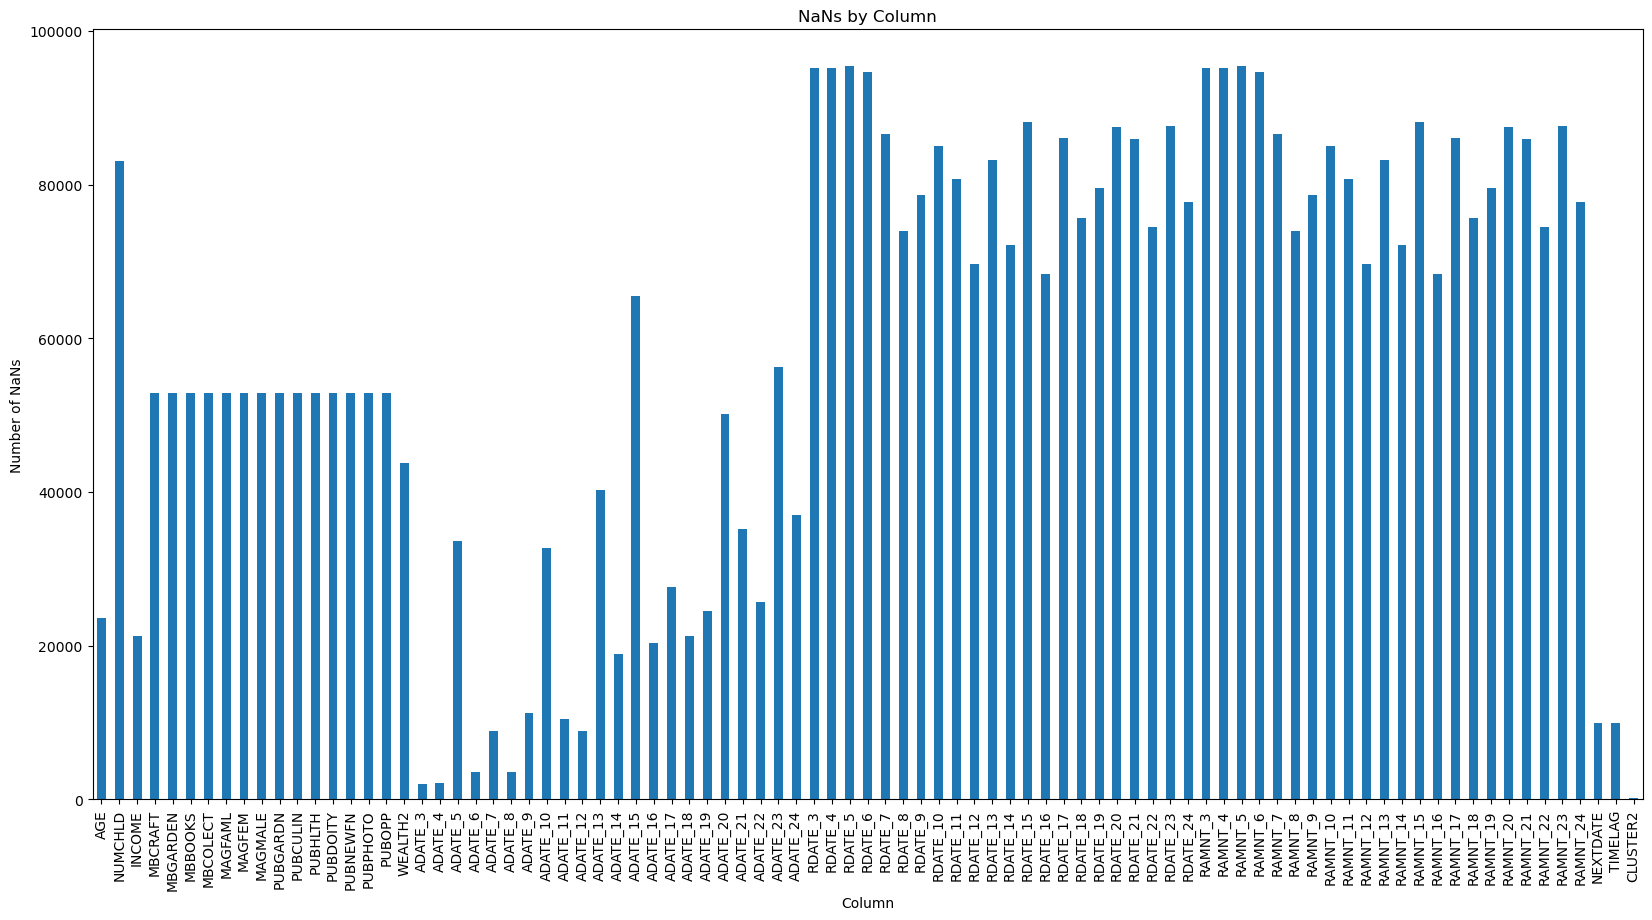

In [60]:
nan_counts.plot(kind='bar', figsize=(20,10))
plt.xlabel('Column')
plt.ylabel('Number of NaNs')
plt.title('NaNs by Column')
plt.show()

In [ ]:
rdate_df = numerical[[col for col in numerical.columns if 'RDATE' in col]]

print(rdate_df)

### Exploring Age, Numchild, Income

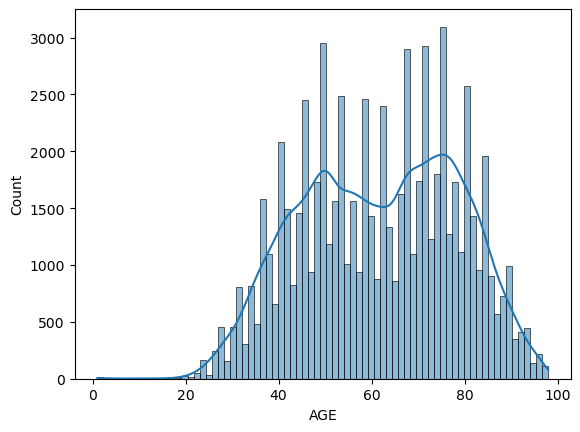

In [61]:
sns.histplot(numerical[numerical['AGE'].isna()==False]['AGE'],kde=True) 
plt.show()

In [62]:
numerical[numerical['AGE'].notna()]['AGE'].mode()[0]

50.0

In [66]:
numerical.loc[:, 'AGE'].mean()

61.61164926756519

As displayed above, using the mode to fill the missing values would not be the best course of action as it is not in line with the most frequently appearing value, the mean. As a result, when cleaning our data and filling in the missing values, as to best represent the dataset we should use the mean rather than the mode

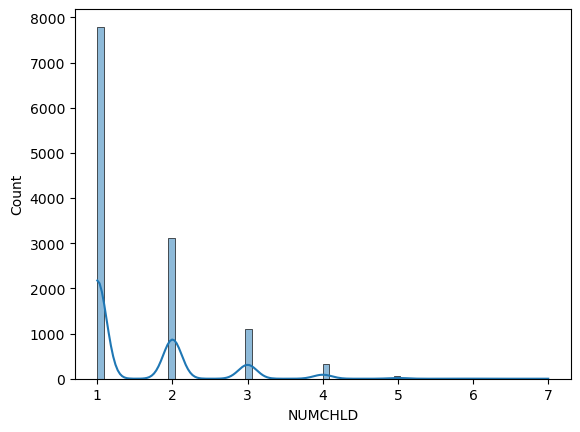

In [69]:
sns.histplot(numerical[numerical['NUMCHLD'].isna()==False]['NUMCHLD'],kde=True) 
plt.show()

In [71]:
numerical[numerical['NUMCHLD'].notna()]['NUMCHLD'].mode()[0]

1.0

In [72]:
numerical.loc[:, 'NUMCHLD'].mean()

1.5277732924269336

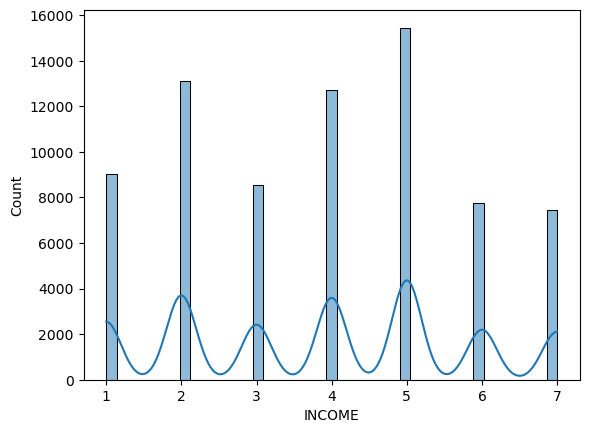

In [73]:
sns.histplot(numerical[numerical['INCOME'].isna()==False]['INCOME'],kde=True) 
plt.show()

In [74]:
numerical[numerical['INCOME'].notna()]['INCOME'].mode()[0]

5.0

In [76]:
numerical.loc[:, 'INCOME'].mean()

3.8862477403340256

The best method for the values with a minority of missing values (e.g. Age, Income) would be to investigate whether the mode or mean would be more appropriate substitutes for the na's. However, with the columns with a majority of missing values such as the RDATE's, the best course of action may be to drop those columns altogether